Análise exploratória do histórico de vendas de carros usados de uma concessionária

In [3]:
#Lendo bibliotecas

import pandas as pd

In [4]:
#Importando dados, criando um dataframe e visualizando as 5 primeiras linhas

df = pd.read_excel('carros_usados.xls')

df.head()


,data.set,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,vehicle.age.group,color.set,makex,state,make.model
0,TRAIN,4037,135,YES,67341,FAMILY.LARGE,Domestic,8,SEVEN+,SILVER,BUICK,CA,BUICK.CENTURY
1,TRAIN,6886,114,YES,72823,FAMILY.MEDIUM,Domestic,6,SIX,WHITE,DODGE,AZ,DODGE.NEON
2,TRAIN,3924,205,YES,96330,FAMILY.MEDIUM,Domestic,9,SEVEN+,WHITE,OLDSMOBILE,FL,OLDSMOBILE.CUTLASS SUPREME
3,TRAIN,4636,100,YES,58519,ECONOMY,Import,4,FOUR,GOLD,KIA,NV,KIA.SEPHIA
4,TRAIN,5080,129,YES,99057,FAMILY.MEDIUM,Domestic,4,FOUR,GREEN,OLDSMOBILE,NV,OLDSMOBILE.CUTLASS SUPREME


In [5]:
#visualizando as informações das colunas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7495 entries, 0 to 7494
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   data.set           7495 non-null   object
 1   total.cost         7495 non-null   int64 
 2   lot.sale.days      7495 non-null   int64 
 3   overage            7495 non-null   object
 4   mileage            7495 non-null   int64 
 5   vehicle.type       7495 non-null   object
 6   domestic.import    7495 non-null   object
 7   vehicle.age        7495 non-null   int64 
 8   vehicle.age.group  7495 non-null   object
 9   color.set          7495 non-null   object
 10  makex              7495 non-null   object
 11  state              7495 non-null   object
 12  make.model         7495 non-null   object
dtypes: int64(4), object(9)
memory usage: 761.3+ KB


In [6]:
#ajustando os nomes das colunas para melhor entendimento e visualização

df.columns = ['data_set','valor_total','dias_venda','vendido_90dias','kilometragem',
            'tipo_veiculo','classe_veiculo','idade_veiculo','grupo_idade','cor','marca','estado','modelo']

#visualizando colunas tratadas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7495 entries, 0 to 7494
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   data_set        7495 non-null   object
 1   valor_total     7495 non-null   int64 
 2   dias_venda      7495 non-null   int64 
 3   vendido_90dias  7495 non-null   object
 4   kilometragem    7495 non-null   int64 
 5   tipo_veiculo    7495 non-null   object
 6   classe_veiculo  7495 non-null   object
 7   idade_veiculo   7495 non-null   int64 
 8   grupo_idade     7495 non-null   object
 9   cor             7495 non-null   object
 10  marca           7495 non-null   object
 11  estado          7495 non-null   object
 12  modelo          7495 non-null   object
dtypes: int64(4), object(9)
memory usage: 761.3+ KB


In [7]:
#obtendo um resumo estatistico das colunas que tem valores inteiros

df.describe()

,valor_total,dias_venda,kilometragem,idade_veiculo
count,7495.000000,7495.000000,7495.000000,7495.000000
mean,4980.035490,76.454303,77234.533422,5.567312
std,937.602064,64.644337,17142.552588,1.756219
min,1375.000000,0.000000,1036.000000,1.000000
25%,4354.000000,14.000000,67946.000000,4.000000
50%,4919.000000,73.000000,78534.000000,5.000000
75%,5540.000000,120.000000,89340.000000,7.000000
max,9813.000000,300.000000,119250.000000,12.000000


In [8]:
#consultando valores nulos

df.isnull().sum()

data_set          0
valor_total       0
dias_venda        0
vendido_90dias    0
kilometragem      0
tipo_veiculo      0
classe_veiculo    0
idade_veiculo     0
grupo_idade       0
cor               0
marca             0
estado            0
modelo            0
dtype: int64

Iniciando a análise exploratória

In [9]:
#lendo as bibliotecas
import seaborn as sns
from matplotlib import pyplot as plt

#definindo o estilo dos graficos
plt.style.use('ggplot')

Text(0.5, 1.0, 'Distribuição do valor total')

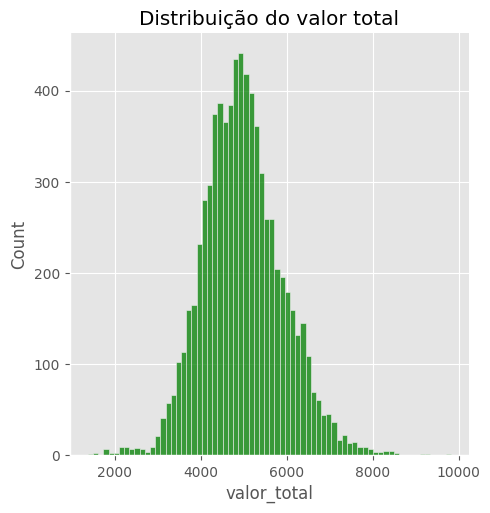

In [10]:
#distribuição do custo total

sns.displot(df['valor_total'], color='green', kde= False)
plt.title('Distribuição do valor total')

Observa-se que a maioria dos carros em o valor entre 4k e 6k

Text(0.5, 1.0, 'Distribuição de dias até a venda')

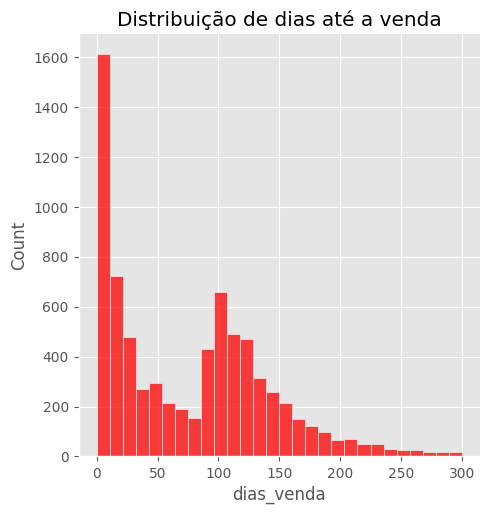

In [11]:
#distribuição dos dias que o veiculo fica parado na concessionaria até a venda

sns.displot(df['dias_venda'],color='red',kde=False)
plt.title('Distribuição de dias até a venda')

A maioria dos veiculos é vendido em até 30 dias ou de 90 a 130 dias.

Text(0.5, 1.0, 'Distribuição da kilometragem')

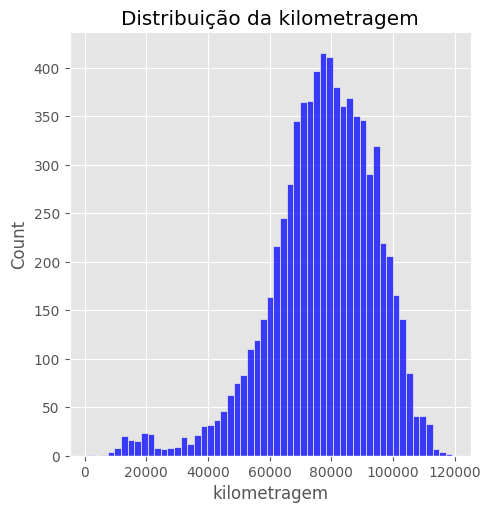

In [12]:
#distribuição kilometragem 

sns.displot(df['kilometragem'],color='blue',kde=False)
plt.title('Distribuição da kilometragem')

Os veiculos tem em sua maioria 70 a 90mil km

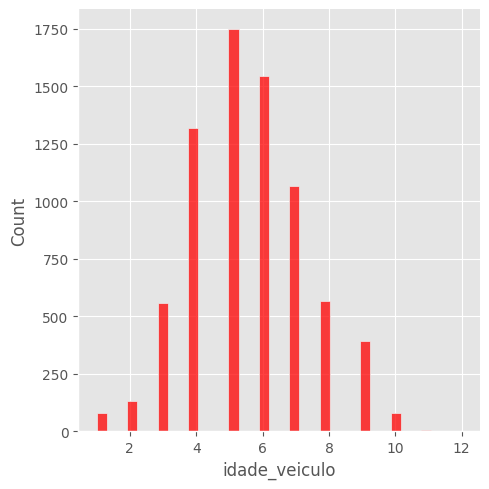

In [16]:
#Distribuição da idade média dos veiculos
sns.displot(df['idade_veiculo'], color='red',kde=False)

Os veiculos tem de 4 a 7 anos

- Abaixo analisaremos a correlações entre entre variáveis com método corr e mapa de temperatura
    - Correlação de Pearson é o método padrão da função "corr". Ele gera um coeficiente linear com valor entre -1 e 1:
        - *1 : Correlação linear positiva, diretamente proporcionais
        - *0 : Sem correlação linear, as variaveis provavelemtne não se afetam
        - *-1 : Correlação linear negativa, inversamente proporcionais

In [ ]:
#O que será analisado?
df[['kilometragem','idade_veiculo','dias_venda','valor_total']].head()

,kilometragem,idade_veiculo,dias_venda,valor_total
0,67341,8,135,4037
1,72823,6,114,6886
2,96330,9,205,3924
3,58519,4,100,4636
4,99057,4,129,5080


In [27]:
#calculando a correlção pelo método corr e armazenando

correlacao = df[['kilometragem','idade_veiculo','dias_venda','valor_total']].corr()
correlacao

,kilometragem,idade_veiculo,dias_venda,valor_total
kilometragem,1.000000,0.462838,0.060003,-0.127258
idade_veiculo,0.462838,1.000000,0.186480,-0.309716
dias_venda,0.060003,0.186480,1.000000,0.167632
valor_total,-0.127258,-0.309716,0.167632,1.000000


Text(0.5, 1.0, 'Grafico de temperatura')

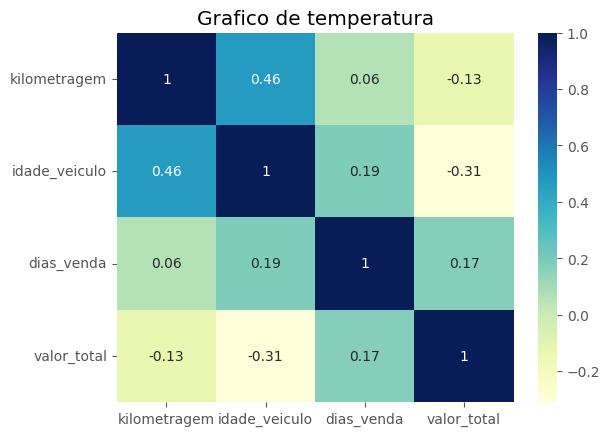

In [31]:
#visualizando o mapa de temperatura para melhor entendimento
sns.heatmap(correlacao,annot=True,cmap="YlGnBu")
plt.title('Grafico de temperatura')

#'annot' - plotar rotulos de valores
#'cmap' - esquema de cores

- Podemos observar que a kilometragem tem relação significativa com a idade do veiculo e uma leve relação com os dias de venda
- Observa-se também que a idade do veiculo pode ter relação com os dias que ele demora para ser vendido

In [32]:
#Qual quantidade de veiculos por modelo?
df['modelo'].value_counts().to_frame()

,count
modelo,
NISSAN.SENTRA,441
CHEVROLET.LUMINA,431
FORD.TAURUS,357
BUICK.LESABRE,271
PONTIAC.GRAND AM,269
...,...
CHRYSLER.FIFTH AVENUE,1
SUBARU.IMPREZA,1
SUBARU.LOYALE,1


In [ ]:
#Quais são as marcas do veiculos?

    #Definindo as marcas
marcas = df['marca'].unique()
    #visualizando
marcas

array(['BUICK', 'DODGE', 'OLDSMOBILE', 'KIA', 'CHEVROLET', 'MITSUBISHI',
       'FORD', 'MERCURY', 'PONTIAC', 'DAEWOO', 'NISSAN', 'GEO',
       'CHRYSLER', 'MAZDA', 'PLYMOUTH', 'TOYOTA', 'HONDA', 'HYUNDAI',
       'OTHER', 'CADILLAC'], dtype=object)

In [58]:
#Contando e apresentando as marcas de veiculos
print('Há um total de',len(marcas),'marcas de veiculos.')

Há um total de 20 marcas de veiculos.


In [59]:
#Quais Quais são so veiculos com mais de 11 anos?
df[df['idade_veiculo']>11]

,data_set,valor_total,dias_venda,vendido_90dias,kilometragem,tipo_veiculo,classe_veiculo,idade_veiculo,grupo_idade,cor,marca,estado,modelo
50,TRAIN,3767,233,YES,87086,FAMILY.MEDIUM,Domestic,12,SEVEN+,BLUE,OLDSMOBILE,VA,OLDSMOBILE.CIERA
209,TRAIN,2954,101,YES,115427,FAMILY.SMALL,Import,12,SEVEN+,GOLD,MAZDA,VA,MAZDA.626
2710,VALIDATE,2530,143,YES,108709,ECONOMY,Domestic,12,SEVEN+,WHITE,CHEVROLET,VA,CHEVROLET.CORSICA


Abaixo observaremos a dispersão entre quantos dias que o carro demora para ser vendido com outras variáveis:

Text(0.5, 1.0, 'Como os dias parado afetam o valor total')

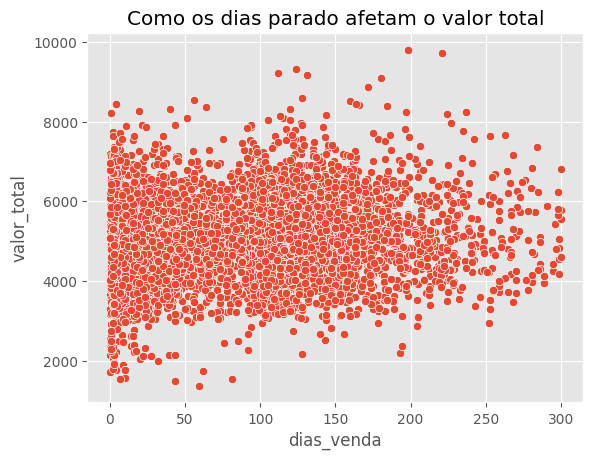

In [61]:
#dias para ser vendido x valor total

sns.scatterplot(x='dias_venda', y='valor_total',data=df)
plt.title('Como os dias parado afetam o valor total')


Text(0.5, 1.0, 'Como os dias parado se relacionam com a kilometragem')

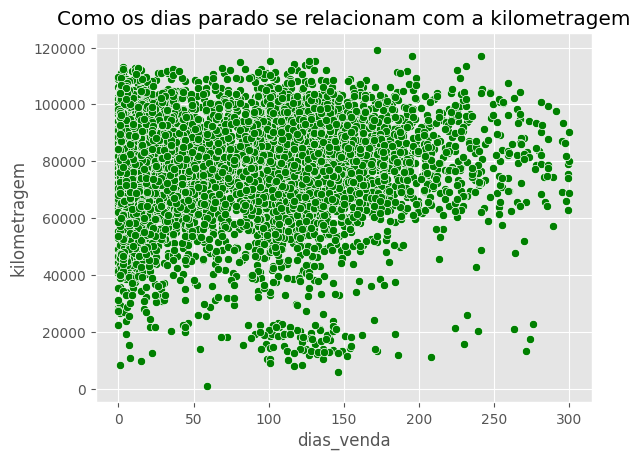

In [64]:
#dias para ser vendido x kilometragem

sns.scatterplot(x='dias_venda', y='kilometragem',color= 'green' ,data=df)
plt.title('Como os dias parado se relacionam com a kilometragem')

Text(0.5, 1.0, 'Tempo de venda por classe')

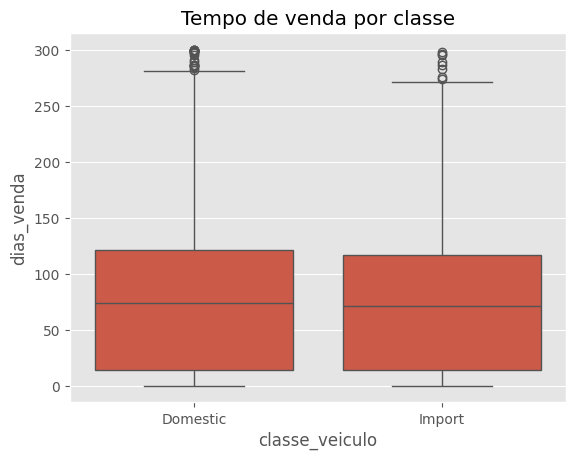

In [96]:
#tempo de venda por classe
sns.boxplot(x= 'classe_veiculo', y= 'dias_venda',data=df)
plt.title('Tempo de venda por classe')

Text(0.5, 1.0, 'Tempo de venda por tipo de veiculo')

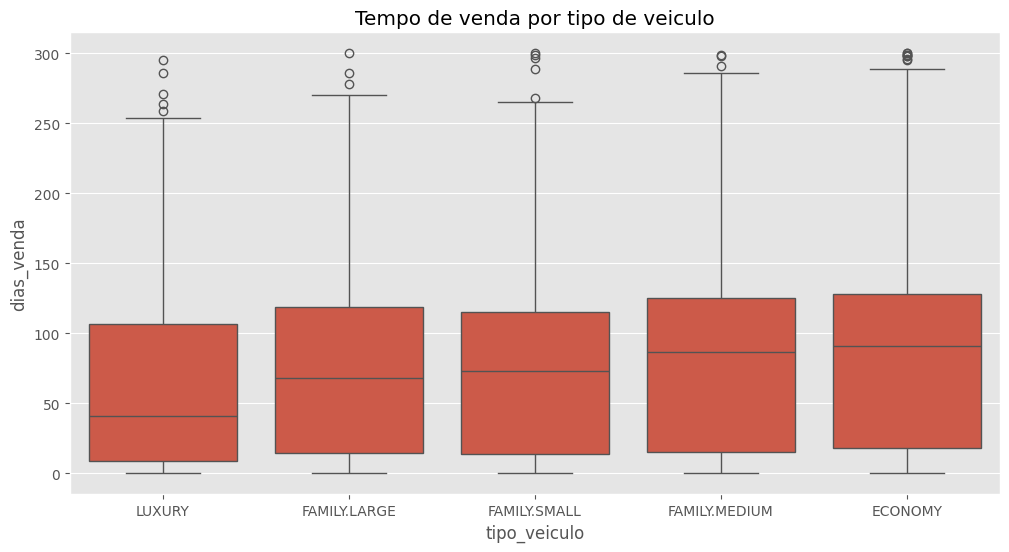

In [101]:
#tempo de venda por tipo de veiculo

#organizando os dados
order = df.groupby('tipo_veiculo')['dias_venda'].median().sort_values().index

#apresentando
plt.figure(figsize=(12,6))
sns.boxplot(x = 'tipo_veiculo', y = 'dias_venda', data=df,order=order)
plt.title('Tempo de venda por tipo de veiculo')

Text(0.5, 1.0, 'Tempo de venda por cor')

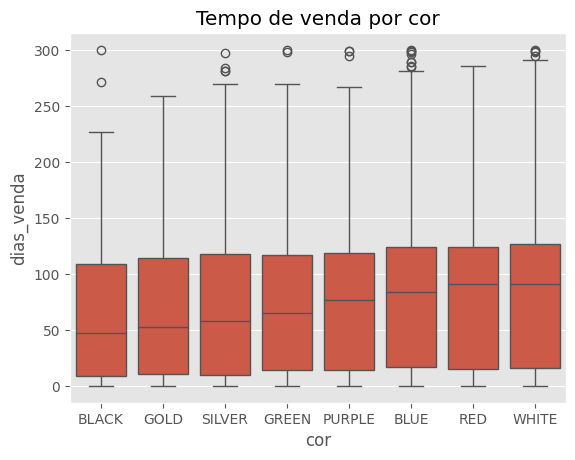

In [94]:
#tempo médio de vendas por cor

#organizando os dados
order = df.groupby('cor')['dias_venda'].median().sort_values().index

#Apresentando
sns.boxplot(x= 'cor',y='dias_venda', data=df, order=order)
plt.title('Tempo de venda por cor')

Text(0.5, 1.0, 'Tempo de venda por marca')

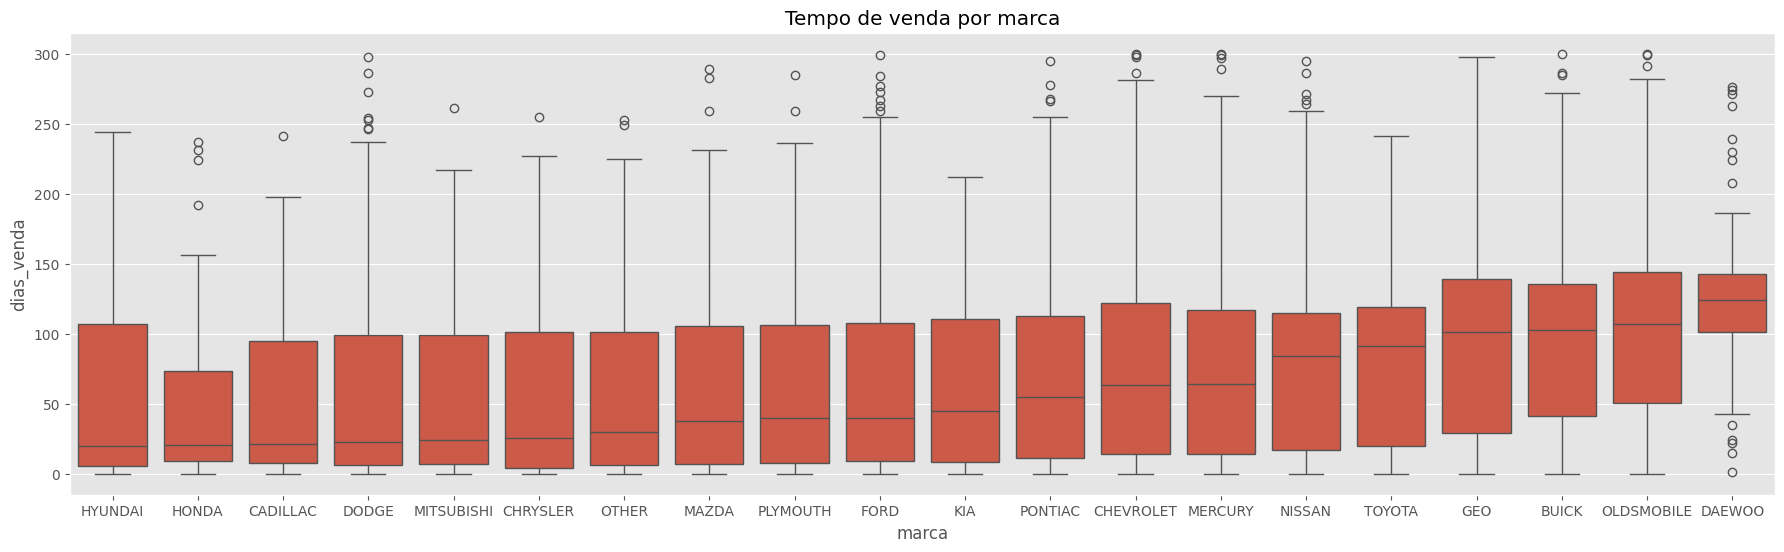

In [98]:
#Tempo médio de vendas por marca

#organizando os dados
order = df.groupby('marca')['dias_venda'].median().sort_values().index

#apresentando
plt.figure(figsize=(22,6))
sns.boxplot(x= 'marca',y='dias_venda', data=df, order=order)
plt.title('Tempo de venda por marca')

Text(0.5, 1.0, 'Tempo de venda por estado')

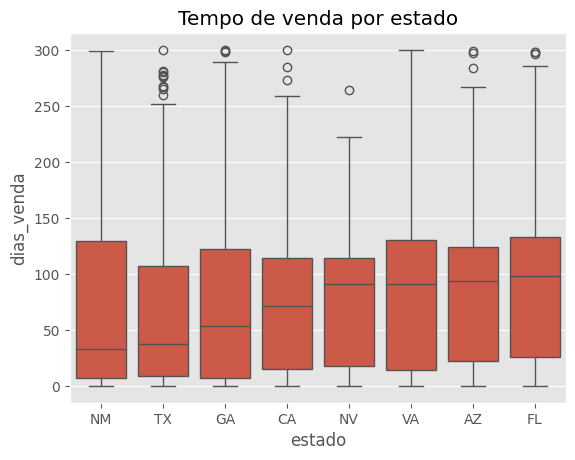

In [107]:
#Tempo médio de vendas por estado

#organizando dados:

order = df.groupby('estado')['dias_venda'].median().sort_values().index

#Apresentando:
sns.boxplot(x='estado',y='dias_venda', data=df, order=order)
plt.title('Tempo de venda por estado')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7495 entries, 0 to 7494
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   data_set        7495 non-null   object
 1   valor_total     7495 non-null   int64 
 2   dias_venda      7495 non-null   int64 
 3   vendido_90dias  7495 non-null   object
 4   kilometragem    7495 non-null   int64 
 5   tipo_veiculo    7495 non-null   object
 6   classe_veiculo  7495 non-null   object
 7   idade_veiculo   7495 non-null   int64 
 8   grupo_idade     7495 non-null   object
 9   cor             7495 non-null   object
 10  marca           7495 non-null   object
 11  estado          7495 non-null   object
 12  modelo          7495 non-null   object
dtypes: int64(4), object(9)
memory usage: 761.3+ KB
